In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [3]:
RNA_set = pd.read_csv('GSE159851_Schaffenrath_RNAseq_GBM_BM_control.csv')
RNA_set

,gene_ID,control_12,control_26,control_11,control_14,control_6,GBM_27,GBM_29,GBM_3,GBM_8,GBM_9,metastasis_21,metastasis_22,metastasis_23,metastasis_28,metastasis_30,control_15,metastasis_16
0,ENSG00000186092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ENSG00000278566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ENSG00000273547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ENSG00000187634,4,2,49,19,2,6,0,13,2,18,0,0,0,4,26,189,0
4,ENSG00000188976,584,396,829,1089,610,730,128,1315,1178,1150,2,66,47,450,507,1243,1037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21903,ENSG00000277856,0,0,0,0,0,0,0,0,0,8,0,0,0,0,4,16,0
21904,ENSG00000275063,0,0,0,0,1,0,0,0,0,12,0,0,0,0,4,131,0
21905,ENSG00000271254,89,205,353,420,278,360,14,385,93,77,0,39,10,56,92,406,41
21906,ENSG00000277475,0,0,7,0,0,0,0,0,0,0,0,12,0,0,0,0,0


In [4]:
#data loading

RNA_flip = np.rot90(RNA_set)
print(np.shape(RNA_flip))
print(type(RNA_flip))
RNA_flip

X = RNA_flip[:17,:]
print(np.shape(X))
print(X)

# 1 = control, 2 = gbm, 3 = metastasis
Y = [3,1,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1]
print(np.shape(Y))
print(Y)

(18, 21908)
<class 'numpy.ndarray'>
(17, 21908)
[[0 0 0 ... 41 0 0]
 [0 0 0 ... 406 0 0]
 [0 0 0 ... 92 0 0]
 ...
 [0 0 0 ... 353 7 0]
 [0 0 0 ... 205 0 0]
 [0 0 0 ... 89 0 0]]
(17,)
[3, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [44]:
#preprocessing
from sklearn.decomposition import PCA

#plt.hist(X,bins=25)
#plt.show()

#x_log = np.log(X)
#plt.hist(x_log)
#plt.show()
pca = PCA(n_components=4)
x_scaled = pca.fit_transform(X)
print(np.shape(x_scaled))
print(pca.explained_variance_ratio_)


(17, 4)
[0.70855413 0.14833145 0.05678859 0.03964501]


the best performing hyperparameter is 4 and its score on the test data is: 0.7143


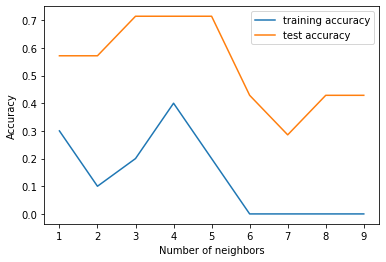

In [79]:
#knn

from sklearn.model_selection import LeaveOneOut

X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y,train_size=0.6, random_state = 42, stratify = Y)
# print(X_train)
# print(y_train)
# print(np.shape(X_train))
# print(np.shape(y_train))
#
training_accuracy = []
test_accuracy = []
besthyperparameterscore = 0
besthyperparameter = 0
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=LeaveOneOut())
    # record training set accuracy
    training_accuracy.append(scores.mean())
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
    if scores.mean() > besthyperparameterscore:
        besthyperparameterscore = scores.mean()
        besthyperparameter = n_neighbors
        testscore_kn = clf.score(X_test, y_test)

print("the best performing hyperparameter is {} ".format(besthyperparameter)+ "and its score on the test data is: {:.4f}".format(testscore_kn))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
plt.show()



Cross-validation scores with C= 0.001 :
[0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
mean score: 0.3
0.2857142857142857
Cross-validation scores with C= 0.01 :
[0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
mean score: 0.3
0.2857142857142857
Cross-validation scores with C= 0.1 :
[0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
mean score: 0.4
0.42857142857142855
Cross-validation scores with C= 1 :
[0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
mean score: 0.3
0.42857142857142855
Cross-validation scores with C= 10 :
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
mean score: 0.2
0.42857142857142855
Cross-validation scores with C= 100 :
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
mean score: 0.2
0.42857142857142855
the best performing C is 0.1 and its mean is: 0.4000


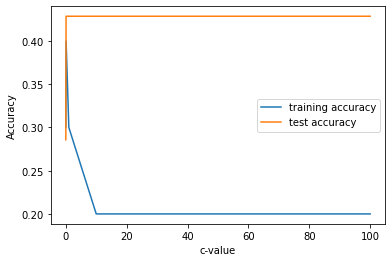

In [88]:
#logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y,train_size=0.6, random_state = 42, stratify = Y)

bestmean = 0
bestc = 0
training_accuracy = []
test_accuracy = []
Crange =  [0.001,0.01,0.1,1,10,100]



for C in Crange:
    logreg = LogisticRegression(max_iter=10000, penalty = "l2",multi_class = 'ovr',solver = 'lbfgs', C = C).fit(X_train, y_train)
    cvs = cross_val_score(logreg, X_train, y_train, cv=LeaveOneOut())
    print("Cross-validation scores with C= {} :\n{}".format(C, cvs))
    mean = cvs.mean()
    print("mean score: {}".format(mean))
    print(logreg.score(X_test, y_test))
    
    # record training set accuracy
    training_accuracy.append(mean)
    # record generalization accuracy
    test_accuracy.append(logreg.score(X_test, y_test))

    if mean > bestmean:
        bestmean = mean
        bestc = C
    

print("the best performing C is {} ".format(bestc)+ "and its mean is: {:.4f}".format(bestmean))

plt.plot(Crange, training_accuracy, label="training accuracy")
plt.plot(Crange, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c-value")
plt.legend()
plt.show()

Cross-validation scores with C= 0.001 :
[1. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
mean score: 0.5
1.0
Cross-validation scores with C= 0.01 :
[1. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
mean score: 0.5
1.0
Cross-validation scores with C= 0.1 :
[1. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
mean score: 0.5
1.0
Cross-validation scores with C= 1 :
[1. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
mean score: 0.5
0.8571428571428571
Cross-validation scores with C= 10 :
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
mean score: 0.4
0.8571428571428571
Cross-validation scores with C= 100 :
[1. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
mean score: 0.5
0.8571428571428571
the best performing C is 0.001 and its score is: 1.0000


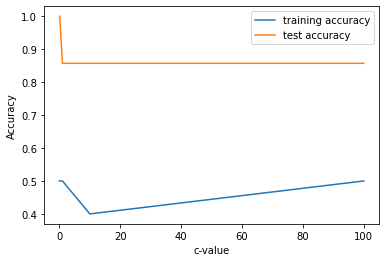

In [82]:
#logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.6, random_state = 42, stratify = Y)

bestmean = 0
bestc = 0
training_accuracy = []
test_accuracy = []
Crange =  [0.001,0.01,0.1,1,10,100]



for C in Crange:
    logreg = LogisticRegression(max_iter=10000, penalty = "l2",multi_class = 'ovr',solver = 'lbfgs', C = C).fit(X_train, y_train)
    cvs = cross_val_score(logreg, X_train, y_train, cv=LeaveOneOut())
    print("Cross-validation scores with C= {} :\n{}".format(C, cvs))
    mean = cvs.mean()
    print("mean score: {}".format(mean))
    print(logreg.score(X_test, y_test))
    
    # record training set accuracy
    training_accuracy.append(mean)
    # record generalization accuracy
    test_accuracy.append(logreg.score(X_test, y_test))

    if mean > bestmean:
        bestmean = mean
        bestc = C
    

print("the best performing C is {} ".format(bestc)+ "and its score is: {:.4f}".format(max(test_accuracy)))

plt.plot(Crange, training_accuracy, label="training accuracy")
plt.plot(Crange, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c-value")
plt.savefig('quint.png')
plt.legend()
plt.show()


0.6470588235294118


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8759e4b9-d387-4a12-8b2e-1c1ffd10dfee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>